<a href="https://colab.research.google.com/github/PaulaLuana/aprendizado-de-maquina/blob/main/Lista5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 05
Treine, avalie (acurácia) e ranqueie os melhores resultados para a resolução do seguinte problema de classificação: 

**Detecção de câncer de mama** - Conjunto de dados disponível em: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data 
Compare os resultados de acurácia de diferentes algoritmos de classificação para cada um dos cenários a seguir:

* Treino (60%) e Teste (40%) - randomizado, mas não estratificado
* Treino (60%) e Teste (40%) - randomizado e estratificado
* Treino (80%) e Teste (20%) - randomizado, mas não estratificado
* Treino (80%) e Teste (20%) - randomizado e estratificado

Use semente de randomização com valor 42 na divisão dos dados e nos algoritmos de aprendizado de máquina que usam randomização (usualmente é usado o parâmetro random_state no Scikit Learn para definição da semente). 

Dica: selecione o melhor modelo/resultado de cada cenário para comparar os cenários entre si. Fique a vontade para usar os recursos do Scikit Learn para dividir, randomizar, estratificar os dados e treinar os modelos de aprendizado de máquina.

## Importações

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine-learning/datasets/cancer-de-mama.csv')

## Conhecendo o dataset

In [ ]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Informações do atributo:

1. ID number
2. Diagnosis (M = malignant, B = benign)

Dez características de valor real são computadas para cada núcleo de célula:

a) radius (média das distâncias do centro aos pontos no perímetro)<br>
b) texture (desvio padrão dos valores da escala de cinza)<br>
c) perimeter<br>
d) area<br>
e) smoothness (variação local nos comprimentos dos raios)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severidade das porções côncavas do contorno)<br>
h) concave points (número de porções côncavas do contorno)<br>
i) symmetry<br>
j) fractal dimension ("aproximação da linha costeira" - 1)<br>

In [ ]:
df = df.iloc[:,:-1]

In [ ]:
df.shape

(569, 32)

In [ ]:
df = df.reindex(columns=['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'])

In [ ]:
df.loc[df['diagnosis'] == 'M', 'diagnosis'] = 1
df.loc[df['diagnosis'] == 'B', 'diagnosis'] = 0

In [ ]:
df = df.astype({'diagnosis': 'int'})

In [ ]:
df.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
df.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [ ]:
matriz_corr = df.corr()

In [ ]:
matriz_corr.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [ ]:
filter = matriz_corr['diagnosis']>=0.4

In [ ]:
matriz_corr['filter'] = filter.values

In [ ]:
matriz_corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,filter
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769,False
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029,True
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185,True
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636,True
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984,True
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560,False
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534,True
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360,True
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614,True
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499,False


Colunas que tem correlacao maior que 0.4 com diagnostico

In [ ]:
selected_columns = matriz_corr.query('filter==True').index

In [ ]:
selected_columns = selected_columns.delete(loc=20)

In [ ]:
selected_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')

In [ ]:
y = df['diagnosis']
x = df[selected_columns]

## Modelos
Os algoritmos utilizandos serao: LogisticRegression, KNeighborsClassifier e DecisionTreeClassifier.
Um algoritmo de classificaco para cada cenario:
* Treino (60%) e Teste (40%) - randomizado, mas não estratificado
* Treino (60%) e Teste (40%) - randomizado e estratificado
* Treino (80%) e Teste (20%) - randomizado, mas não estratificado
* Treino (80%) e Teste (20%) - randomizado e estratificado

**Use semente de randomização com valor 42 na divisão dos dados** e nos algoritmos de aprendizado de máquina que usam randomização (usualmente é usado o parâmetro random_state no Scikit Learn para definição da semente).

### LogisticRegression

#### Treino (60%) e Teste (40%) - randomizado, mas não estratificado

In [ ]:
lr = list()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
pipe.score(X_test, y_test)

0.9868421052631579

In [ ]:
lr.append(pipe.score(X_test, y_test))

#### Treino (60%) e Teste (40%) - randomizado e estratificado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
pipe.score(X_test, y_test)

0.9736842105263158

In [ ]:
lr.append(pipe.score(X_test, y_test))

#### Treino (80%) e Teste (20%) - randomizado, mas não estratificado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
pipe.score(X_test, y_test)

0.9824561403508771

In [ ]:
lr.append(pipe.score(X_test, y_test))

#### Treino (80%) e Teste (20%) - randomizado e estratificado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
pipe.score(X_test, y_test)

0.9912280701754386

In [ ]:
lr.append(pipe.score(X_test, y_test))

### KNeighborsClassifier

#### Treino (60%) e Teste (40%) - randomizado, mas não estratificado

In [ ]:
knn = list()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
pipe.score(X_test, y_test)

0.9605263157894737

In [ ]:
knn.append(pipe.score(X_test, y_test))

#### Treino (60%) e Teste (40%) - randomizado e estratificado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)

In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
pipe.score(X_test, y_test)

0.9605263157894737

In [ ]:
knn.append(pipe.score(X_test, y_test))

#### Treino (80%) e Teste (20%) - randomizado, mas não estratificado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
pipe.score(X_test, y_test)

0.9649122807017544

In [ ]:
knn.append(pipe.score(X_test, y_test))

#### Treino (80%) e Teste (20%) - randomizado e estratificado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
pipe.score(X_test, y_test)

0.9649122807017544

In [ ]:
knn.append(pipe.score(X_test, y_test))

### DecisionTreeClassifier

#### Treino (60%) e Teste (40%) - randomizado, mas não estratificado

In [ ]:
tree = list()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [ ]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
pipe.score(X_test, y_test)

0.9429824561403509

In [ ]:
tree.append(pipe.score(X_test, y_test))

#### Treino (60%) e Teste (40%) - randomizado e estratificado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)

In [ ]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
pipe.score(X_test, y_test)

0.9298245614035088

In [ ]:
tree.append(pipe.score(X_test, y_test))

#### Treino (80%) e Teste (20%) - randomizado, mas não estratificado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
pipe.score(X_test, y_test)

0.9210526315789473

In [ ]:
tree.append(pipe.score(X_test, y_test))

#### Treino (80%) e Teste (20%) - randomizado e estratificado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
pipe.score(X_test, y_test)

0.9035087719298246

In [ ]:
tree.append(pipe.score(X_test, y_test))

## Analises

### Modelos dos algoritmos
**LogisticRegression**

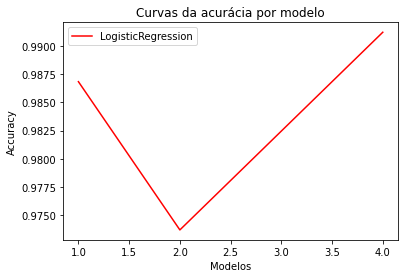

In [ ]:
epochs = range(1, 5)
plt.plot(epochs, lr, label="LogisticRegression", color='red')
plt.title("Curvas da acurácia por modelo")
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**KNeighborsClassifier**

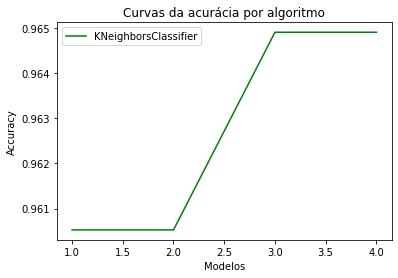

In [ ]:
plt.plot(epochs, knn, label="KNeighborsClassifier", color='green')
plt.title("Curvas da acurácia por algoritmo")
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**DecisionTreeClassifier**

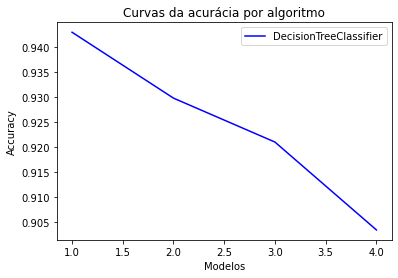

In [ ]:
plt.plot(epochs, tree, label="DecisionTreeClassifier", color='blue')
plt.title("Curvas da acurácia por algoritmo")
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Algoritmos


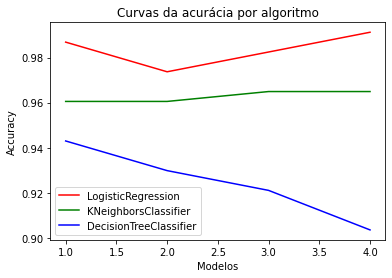

In [ ]:
plt.plot(epochs, lr, label="LogisticRegression", color='red')
plt.plot(epochs, knn, label="KNeighborsClassifier", color='green')
plt.plot(epochs, tree, label="DecisionTreeClassifier", color='blue')
plt.title("Curvas da acurácia por algoritmo")
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Criando o Ranking

In [ ]:
modelos = ['LR', 'KNN', 'TREE']
modelos_ = list()
for i in modelos:
  for j in np.arange(4):
    modelos_.append(i)

In [ ]:
estratificado = [0, 1]
estratificado_ = list()
for i in np.arange(6):
  for j in estratificado:
    estratificado_.append(j)

In [ ]:
train_size = [60, 60, 80, 80]
train_size_ = list()
for i in np.arange(3):
  for j in train_size:
    train_size_.append(j)

In [ ]:
accs = lr + knn + tree
accs

[0.9868421052631579,
 0.9736842105263158,
 0.9824561403508771,
 0.9912280701754386,
 0.9605263157894737,
 0.9605263157894737,
 0.9649122807017544,
 0.9649122807017544,
 0.9429824561403509,
 0.9298245614035088,
 0.9210526315789473,
 0.9035087719298246]

In [ ]:
ranking = pd.DataFrame({'Modelos' : modelos_,
                        'Estratificado' : estratificado_,
                        'train_size' : train_size_,
                        'Acuracia' : accs})

In [ ]:
ranking

,Modelos,Estratificado,train_size,Acuracia
0,LR,0,60,0.986842
1,LR,1,60,0.973684
2,LR,0,80,0.982456
3,LR,1,80,0.991228
4,KNN,0,60,0.960526
5,KNN,1,60,0.960526
6,KNN,0,80,0.964912
7,KNN,1,80,0.964912
8,TREE,0,60,0.942982
9,TREE,1,60,0.929825


### Ranking

In [ ]:
ranking.sort_values(by=['Acuracia'], ascending=False)

,Modelos,Estratificado,train_size,Acuracia
3,LR,1,80,0.991228
0,LR,0,60,0.986842
2,LR,0,80,0.982456
1,LR,1,60,0.973684
6,KNN,0,80,0.964912
7,KNN,1,80,0.964912
4,KNN,0,60,0.960526
5,KNN,1,60,0.960526
8,TREE,0,60,0.942982
9,TREE,1,60,0.929825
